In [80]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize']=(12,8)

In [82]:
data = pd.read_csv('bike_sharing_data.txt')

In [83]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [84]:
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [85]:
data.shape

(97, 2)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit in $10000s vs city population in 10000s')

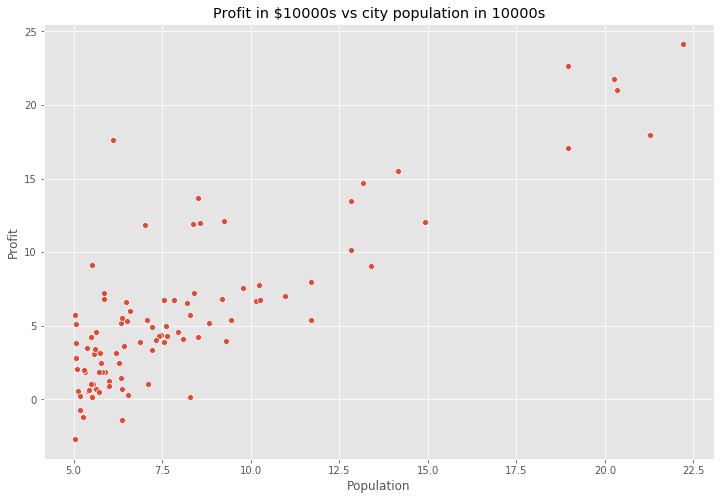

In [87]:
ax = sns.scatterplot(data['Population'],data['Profit'])
ax.set_title("Profit in $10000s vs city population in 10000s")

In [88]:
def cost_function(X,y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return 1/(2*m)*np.sum(error)

In [89]:
m = data.Population.values.size

In [90]:
data.shape

(97, 2)

In [91]:
data.Population.values.reshape(m,1)

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [92]:

X = np.append(np.ones((m, 1)),data.Population.values.reshape(m,1),axis=1)


In [93]:
y = data.Profit.values.reshape(m,1)

In [94]:
theta = np.zeros((2,1))

In [95]:
cost_function(X,y,theta)

32.072733877455676

In [96]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    costs=[]
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred - y))
        theta -= alpha*1/m*error
        costs.append(cost_function(X,y,theta))
    return theta,costs
        

In [97]:
theta, costs = gradient_descent(X,y,theta,alpha=0.01,iterations=2000)
print("h(x) = {}+{}x1".format(str(round(theta[0,0],2)),
     str(round(theta[1,0],2))))

h(x) = -3.79+1.18x1


In [98]:
from mpl_toolkits.mplot3d import Axes3D

In [99]:
theta_0 = np.linspace(-10,10,100)


In [100]:
theta_1 = np.linspace(-1,4,100)

In [101]:
cost_values = np.zeros((len(theta_0),len(theta_1)))

In [102]:
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_function(X,y,t)
        

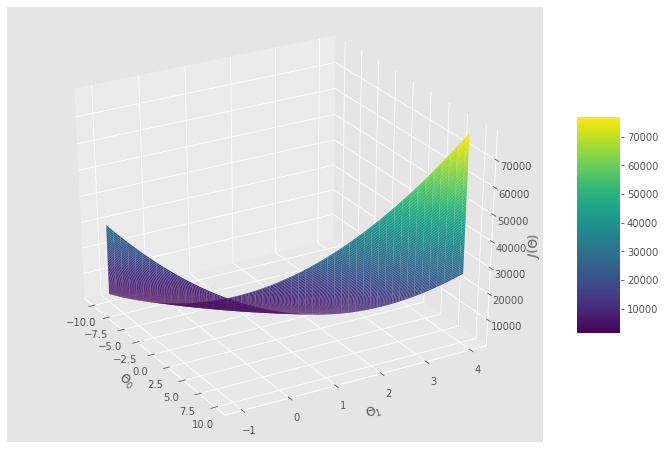

In [108]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values, cmap='viridis')
fig.colorbar(surf,shrink=0.5, aspect=5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)
plt.show()

Text(0.5, 1.0, 'Values of the cost function over iterations of gradient descents')

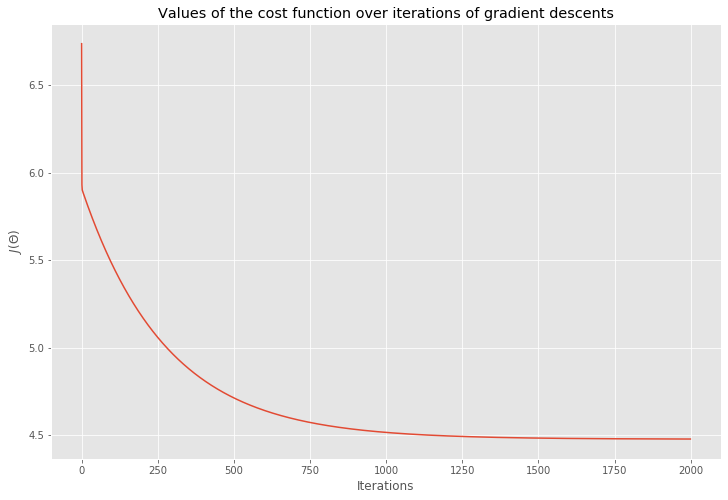

In [110]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the cost function over iterations of gradient descents")

In [112]:
theta.shape

(2, 1)

In [113]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Linear Regression Fit')

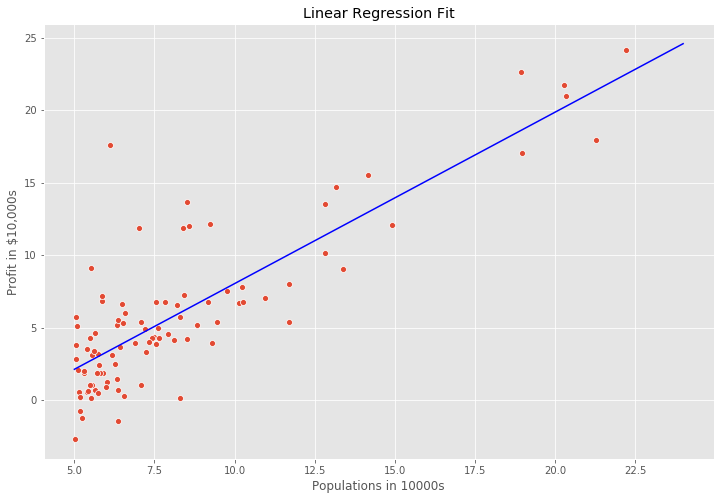

In [116]:
theta = np.squeeze(theta)
sns.scatterplot(data['Population'],data['Profit'])
x_value = [x for x in range(5,25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value,color="blue")
plt.xlabel("Populations in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")

In [117]:
def predict(x,theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [ ]:
y_pred_1 = predict(np.array[1,4],theta)*10000